In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Changement de l'affichage des float pour eviter e+..
pd.options.display.float_format = '{:.5f}'.format

df = pd.read_csv("./KaDo.csv")
df.head()

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
0,35592159,10,1.67000,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281.00000
1,35592159,10,1.66000,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281.00000
2,35592159,10,7.45000,SOINS DU VISAGE,VIS_CJOUR Jeunes Specifique,VIS_JEUNE_ET_LEVRE,CR JR PARF BIO.SPE AC.SENT.50ML,1490281.00000
3,35592159,10,5.95000,SOINS DU VISAGE,VIS_DEMAQ AAAR,VIS_AAAR_DEMAQLOTION,EAU MICELLAIRE 3 THES FL200ML,1490281.00000
4,35592159,10,1.67000,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 TIARE FL 200ML,1490281.00000


In [3]:
# Dimension nombre de ligne/commandes et nombre de colonne
df.shape

(7214466, 8)

In [4]:
# Vérification des types pour voir si il n'y a pas de conversion à faire
df.dtypes

TICKET_ID       int64
MOIS_VENTE      int64
PRIX_NET      float64
FAMILLE        object
UNIVERS        object
MAILLE         object
LIBELLE        object
CLI_ID        float64
dtype: object

In [5]:
# Nombre de client
nombre_clients = len(df["CLI_ID"].unique())
print(f"Nombre de client: {nombre_clients}")

Nombre de client: 846189


In [6]:
# Statistique général sur le prix
prix_max = df["PRIX_NET"].max()
prix_min = df["PRIX_NET"].min()
prix_moyen = df["PRIX_NET"].mean()
benef = df["PRIX_NET"].sum()

print(f"Prix max: {prix_max}€, min: {prix_min}€, moyen: {prix_moyen}€")
print(f"Bénéfice total: {benef}€")

Prix max: 1575.0€, min: 0.01€, moyen: 5.971431929958506€
Bénéfice total: 43080692.63000002€


In [7]:
# Statistique général sur les commandes
nombre_commande_max = df["CLI_ID"].value_counts().max()
nombre_commande_min = df["CLI_ID"].value_counts().min()
nombre_commande_moyen = df["CLI_ID"].value_counts().mean()

print(f"Par client, nombre max de commande: {nombre_commande_max}, min: {nombre_commande_min}, moyenne: {nombre_commande_moyen}")

Par client, nombre max de commande: 834, min: 1, moyenne: 8.525841775113804


In [8]:
# Commande la plus chère
df.loc[df["PRIX_NET"] == df["PRIX_NET"].max()]

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
5085421,33107984,1,1575.00000,PARFUMAGE,PARF_PARF ET EAU DE PARF,PARF_PARFUM,EDP EVIDENCE VAPO 100ML,990122959.00000


In [9]:
# Somme total dépensé par chaque client
df.groupby(['CLI_ID'])["PRIX_NET"].sum()

CLI_ID
1490281.00000      18.40000
13290776.00000     55.50000
20163348.00000      7.45000
20200041.00000      6.70000
20561854.00000      7.05000
20727324.00000     13.25000
20791601.00000     23.80000
21046542.00000    166.20000
21239163.00000     12.65000
21351166.00000      7.40000
21497331.00000     33.35000
21504227.00000      1.95000
21514622.00000     17.90000
69813934.00000    117.70000
71891681.00000     44.25000
85057203.00000     23.50000
85841284.00000    162.25000
90822328.00000     92.05000
93806295.00000      6.00000
100023116.00000     9.60000
100064590.00000   108.30000
126716008.00000    26.50000
131204016.00000    37.85000
169985247.00000   186.59000
191914645.00000     7.50000
195207210.00000   110.15000
206111880.00000     6.15000
242424645.00000     5.00000
243624087.00000    31.15000
275493987.00000   204.25000
                     ...   
996926404.00000     5.00000
996926420.00000     4.90000
996926438.00000     5.90000
996926454.00000     5.95000
996926462.000

In [10]:
# Meilleur client
df.groupby("CLI_ID").agg({"PRIX_NET": "sum"}).sort_values(by='PRIX_NET', ascending=False).head(1)

,PRIX_NET
CLI_ID,
967051620.00000,13536.95000


In [11]:
# Du mois le plus rentable au mois le moins rentable
df.groupby("MOIS_VENTE").agg({"PRIX_NET": "sum"}).sort_values(by='PRIX_NET', ascending=False)

,PRIX_NET
MOIS_VENTE,
12,5345158.44004
7,4209600.08002
6,4118681.68002
1,3922441.38002
5,3769591.64001
11,3457041.02001
9,3211772.04001
3,3200551.14001
4,3109273.54000


range(1, 13)


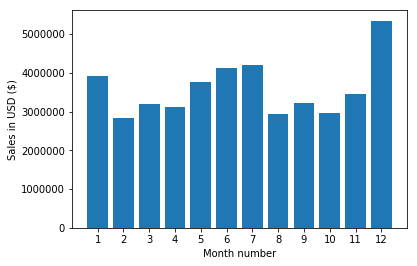

In [19]:
months = range(1,13)
plt.bar(months,df.groupby("MOIS_VENTE").agg({"PRIX_NET": "sum"})["PRIX_NET"])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [42]:
# Nombre de commande par mois
orders_by_month = df.groupby("MOIS_VENTE").agg({"TICKET_ID": pd.Series.nunique}).sort_values(by='TICKET_ID', ascending=False)
orders_by_month

,TICKET_ID
MOIS_VENTE,
12,317175
7,277378
6,258118
1,257093
9,226986
5,212458
11,210990
8,203518
3,198069


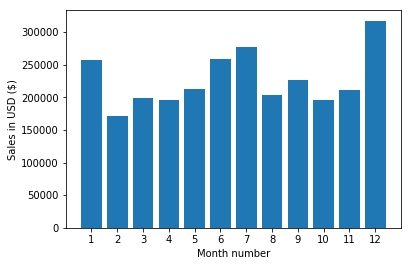

In [44]:
months = range(1,13)
plt.bar(months, df.groupby("MOIS_VENTE").agg({"TICKET_ID": pd.Series.nunique})["TICKET_ID"])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [40]:
# De la famille la plus rentable à la moins rentable
familly_by_month = df.groupby("FAMILLE").agg({"PRIX_NET": "sum"}).sort_values(by='PRIX_NET', ascending=False)
familly_by_month

,PRIX_NET
FAMILLE,
MAQUILLAGE,11174320.83997
SOINS DU VISAGE,10460198.75999
PARFUMAGE,8424678.06003
HYGIENE,5790264.28007
SOINS DU CORPS,4813938.42004
CAPILLAIRES,1251699.52999
SOLAIRES,1165416.59000
MULTI FAMILLES,136.00000
SO,25.20000


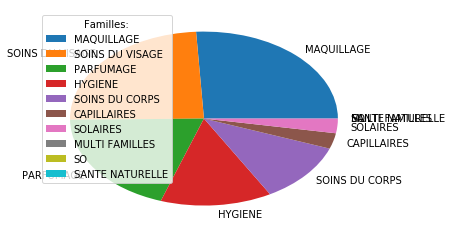

In [50]:
plt.pie(familly_by_month["PRIX_NET"], labels = familly_by_month.index)
plt.legend(title = "Familles:")
plt.show()

In [48]:
# Nombre de commande par famille
orders_by_familly = df.groupby("FAMILLE").agg({"TICKET_ID": pd.Series.nunique}).sort_values(by='TICKET_ID', ascending=False)
orders_by_familly

,TICKET_ID
FAMILLE,
MAQUILLAGE,1019787
SOINS DU VISAGE,978839
HYGIENE,959766
SOINS DU CORPS,651650
PARFUMAGE,510154
CAPILLAIRES,209326
SOLAIRES,118945
MULTI FAMILLES,29
SANTE NATURELLE,1


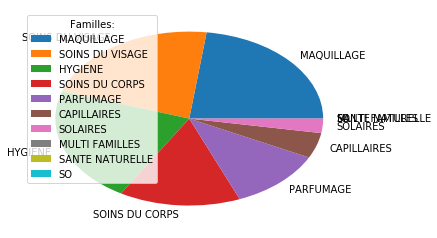

In [49]:
plt.pie(orders_by_familly["TICKET_ID"], labels = orders_by_familly.index)
plt.legend(title = "Familles:")
plt.show()

In [15]:
# Test pour voir si les données sont bien calculées
df.loc[df["FAMILLE"] == "SANTE NATURELLE"]

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
6458712,33072287,1,14.95000,SANTE NATURELLE,DIETETIQUE,DIETETIQUE,SOIN COSM ORALE 3X10 CAPS RC2,993646584.00000
